<a href="https://colab.research.google.com/github/marleyabe/Data-IESB/blob/main/Trabalho%20infer%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [41]:
pd.set_option('display.float_format', '{:.2f}'.format)

# Importação dos Dados

In [9]:
df = pd.read_csv('/content/br_sp_gov_ssp_ocorrencias_registradas.csv', sep=',')

In [13]:
df.head()

,ano,mes,id_municipio,regiao_ssp,homicidio_doloso,numero_de_vitimas_em_homicidio_doloso,homicidio_doloso_por_acidente_de_transito,numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito,homicidio_culposo_por_acidente_de_transito,homicidio_culposo_outros,...,total_de_estupro,estupro,estupro_de_vulneravel,total_de_roubo_outros,roubo_outros,roubo_de_veiculo,roubo_a_banco,roubo_de_carga,furto_outros,furto_de_veiculo
0,2002,1,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,21.0,0.0
1,2002,2,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,32.0,0.0
2,2002,3,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,36.0,0.0
3,2002,4,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,45.0,0.0
4,2002,5,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,35.0,0.0


# Tratamento de Dados

In [48]:
df["ano"] = df["ano"].astype(str)
df["mes"] = df["mes"].astype(str)
df["id_municipio"] = df["id_municipio"].astype(str)

# Qualidade dos Dados

In [31]:
print(len(df))
round(((df.isna().sum() - len(df)) * -1) / len(df), 2)

153876


,0
ano,1.00
mes,1.00
id_municipio,1.00
regiao_ssp,1.00
homicidio_doloso,0.98
numero_de_vitimas_em_homicidio_doloso,0.98
homicidio_doloso_por_acidente_de_transito,0.93
numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito,0.93
homicidio_culposo_por_acidente_de_transito,0.98
homicidio_culposo_outros,0.98


<p>Apesar de alguns dados estarem vazios, com menos de 30% de dados preenchidos, isso quer dizer que o município não teve aquela incidência.</p>

In [39]:
for col in df.columns[4:]:
  print(f"{col} : {df[col].min()}, {df[col].max()}")

homicidio_doloso : 0.0, 474.0
numero_de_vitimas_em_homicidio_doloso : 0.0, 499.0
homicidio_doloso_por_acidente_de_transito : 0.0, 8.0
numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito : 0.0, 11.0
homicidio_culposo_por_acidente_de_transito : 0.0, 91.0
homicidio_culposo_outros : 0.0, 33.0
tentativa_de_homicidio : 0.0, 288.0
lesao_corporal_seguida_de_morte : 0.0, 6.0
lesao_corporal_dolosa : 0.0, 4283.0
lesao_corporal_culposa_por_acidente_de_transito : 0.0, 2724.0
lesao_corporal_culposa_outras : 0.0, 254.0
latrocinio : 0.0, 25.0
numero_de_vitimas_em_latrocinio : 0.0, 28.0
total_de_estupro : 0.0, 329.0
estupro : 0.0, 103.0
estupro_de_vulneravel : 0.0, 218.0
total_de_roubo_outros : 0.0, 14927.0
roubo_outros : 0.0, 14337.0
roubo_de_veiculo : 0.0, 5082.0
roubo_a_banco : 0.0, 34.0
roubo_de_carga : 0.0, 655.0
furto_outros : 0.0, 25063.0
furto_de_veiculo : 0.0, 5296.0


<p>O domínio das variáveis parecem ok. Não tem dados negativos ou dados que parecem fugir da realidade.</p>

# EDA

In [49]:
df.describe()

,homicidio_doloso,numero_de_vitimas_em_homicidio_doloso,homicidio_doloso_por_acidente_de_transito,numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito,homicidio_culposo_por_acidente_de_transito,homicidio_culposo_outros,tentativa_de_homicidio,lesao_corporal_seguida_de_morte,lesao_corporal_dolosa,lesao_corporal_culposa_por_acidente_de_transito,...,total_de_estupro,estupro,estupro_de_vulneravel,total_de_roubo_outros,roubo_outros,roubo_de_veiculo,roubo_a_banco,roubo_de_carga,furto_outros,furto_de_veiculo
count,151296.00,151296.00,143700.00,143700.00,151296.00,151296.00,151296.00,105228.00,151296.00,151296.00,...,151296.00,35988.00,43680.00,151296.00,35988.00,151296.00,151296.00,151296.00,151296.00,151296.00
mean,0.67,0.71,0.00,0.00,0.54,0.03,0.75,0.00,21.44,15.18,...,1.06,0.40,0.97,32.46,31.96,9.31,0.03,0.92,66.75,13.51
std,6.78,7.21,0.07,0.09,2.36,0.32,5.40,0.08,119.10,81.55,...,7.30,2.69,5.73,427.80,444.89,126.97,0.49,14.08,598.92,153.60
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,9.00,0.00
75%,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,17.00,9.00,...,1.00,0.00,1.00,4.00,3.00,1.00,0.00,0.00,35.00,2.00
max,474.00,499.00,8.00,11.00,91.00,33.00,288.00,6.00,4283.00,2724.00,...,329.00,103.00,218.00,14927.00,14337.00,5082.00,34.00,655.00,25063.00,5296.00


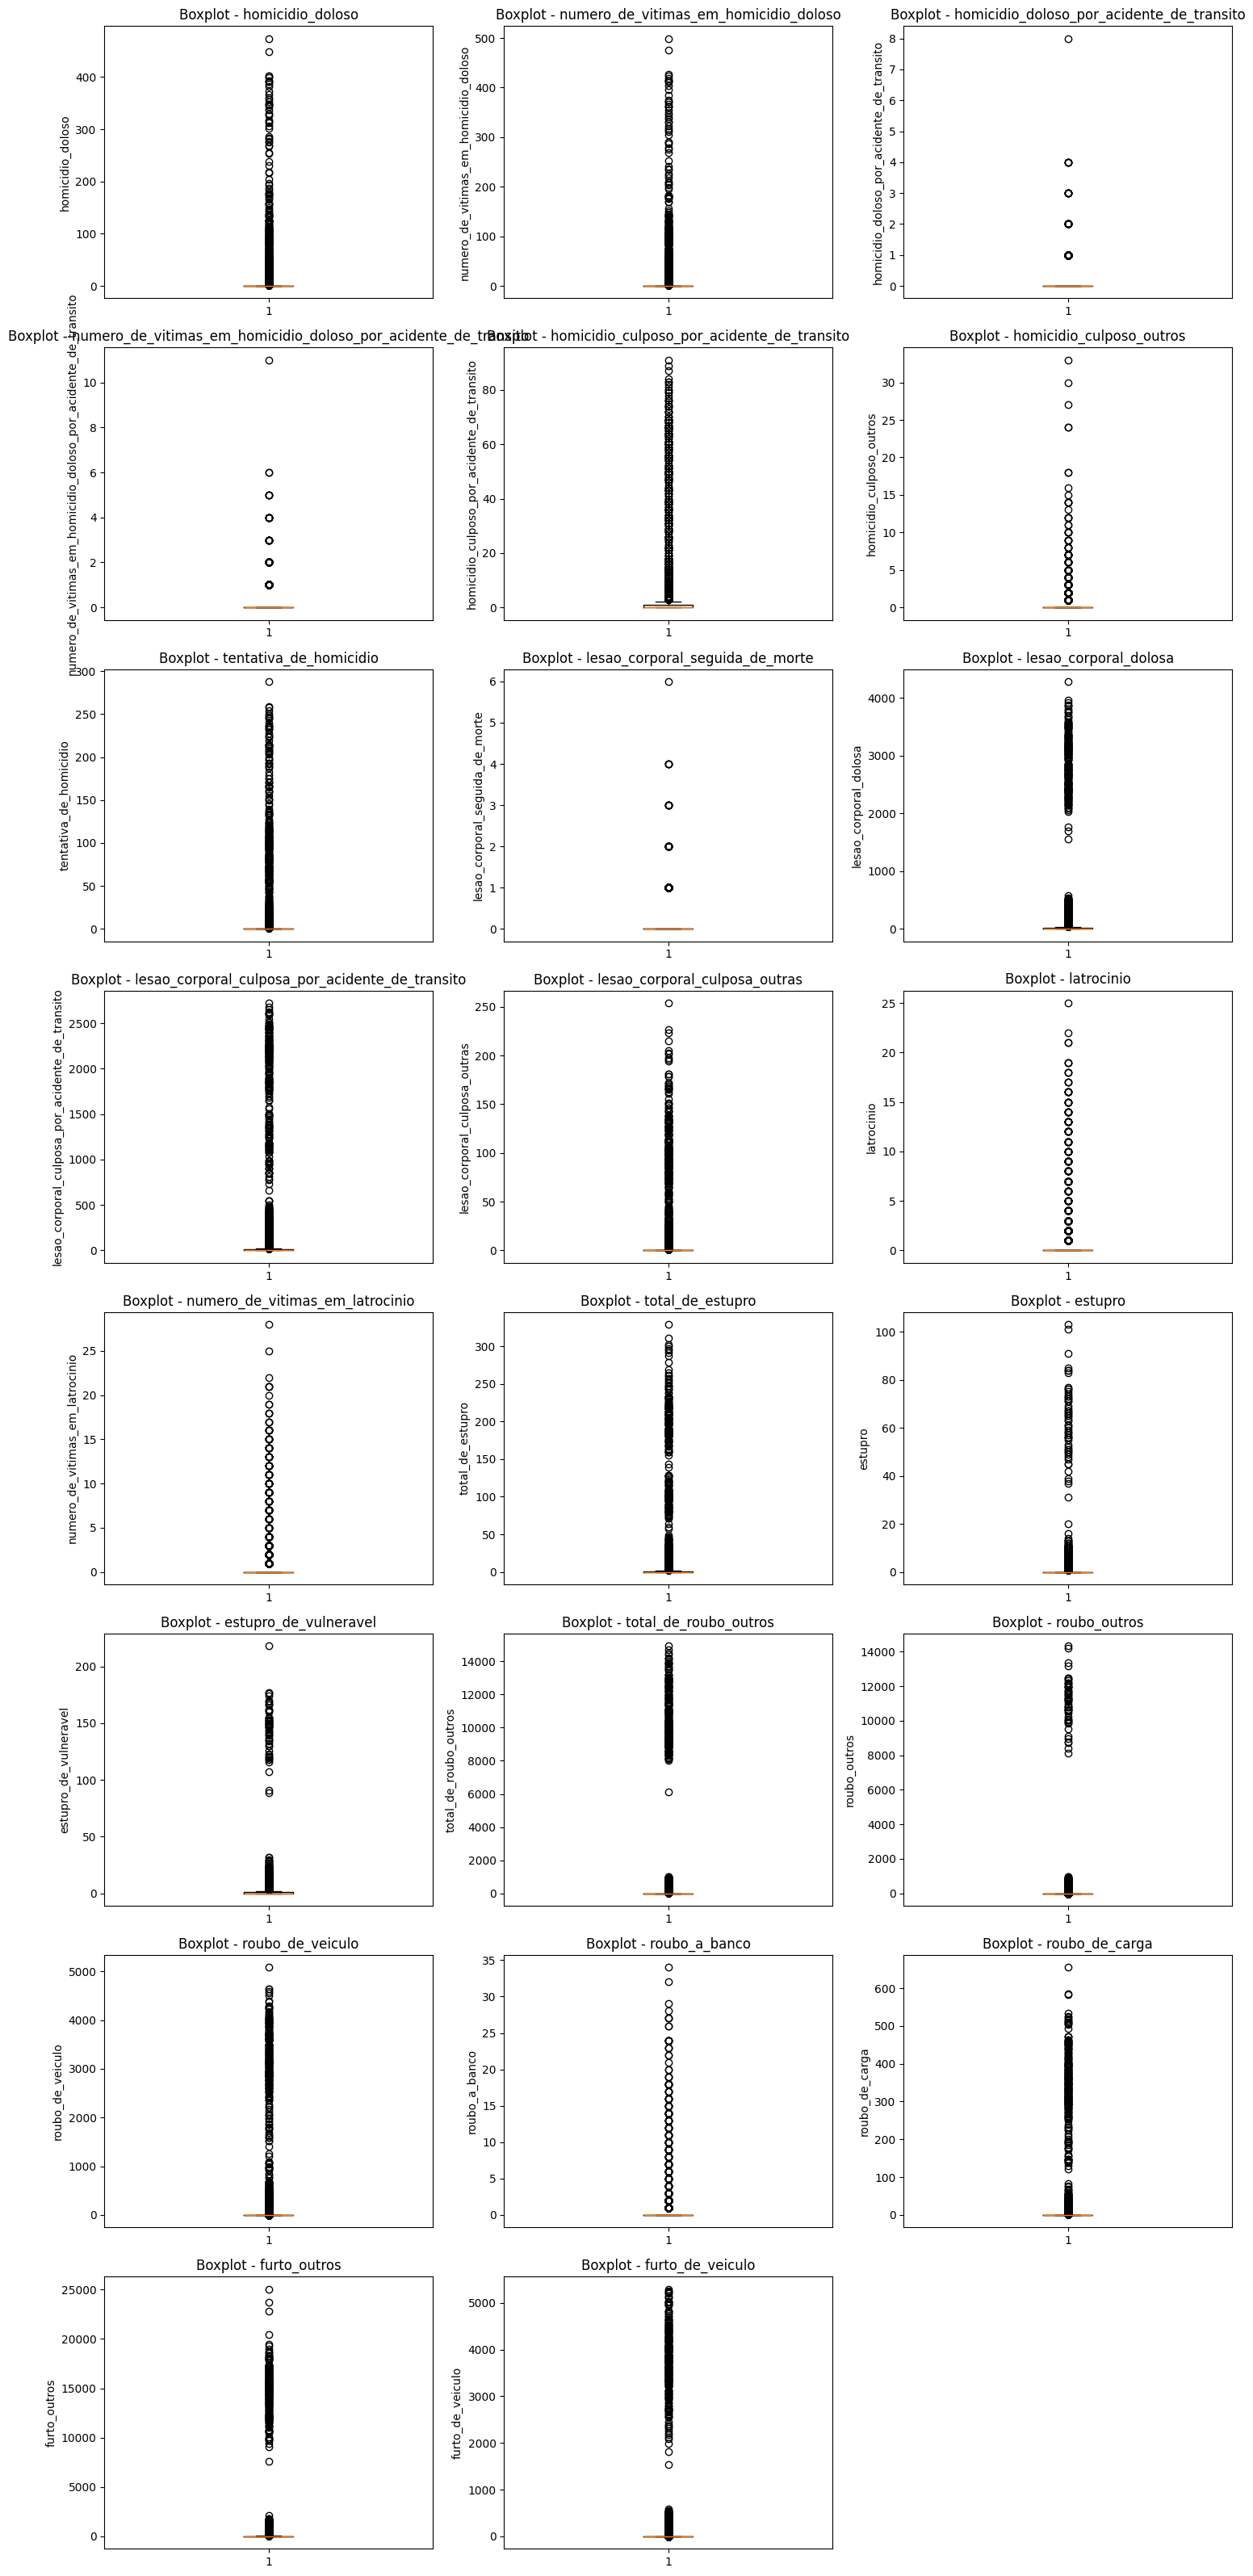

In [55]:
# Suponha que você já tenha o DataFrame carregado
# Exemplo: df = pd.read_csv("sua_base.csv")

# Seleciona apenas as colunas numéricas
numericas = df.select_dtypes(include='number')

# Número de colunas numéricas
n = len(numericas.columns)

# Define o layout da grade (ex: 3 colunas por linha)
cols = 3
rows = math.ceil(n / cols)

# Cria os subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

# Garantir que 'axes' é sempre 2D
axes = axes.flatten()

# Gera um boxplot para cada variável numérica
for i, coluna in enumerate(numericas.columns):
    axes[i].boxplot(numericas[coluna].dropna())
    axes[i].set_title(f'Boxplot - {coluna}')
    axes[i].set_ylabel(coluna)

# Remove subplots vazios (se houver)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<p>Todas as colunas estão concentradas nos valores mais baixos no boxsplot, isso quer dizer que a maioria dos municípios tem poucos crimes em comparação aos poucos municípios que tem mais crimes.</p>

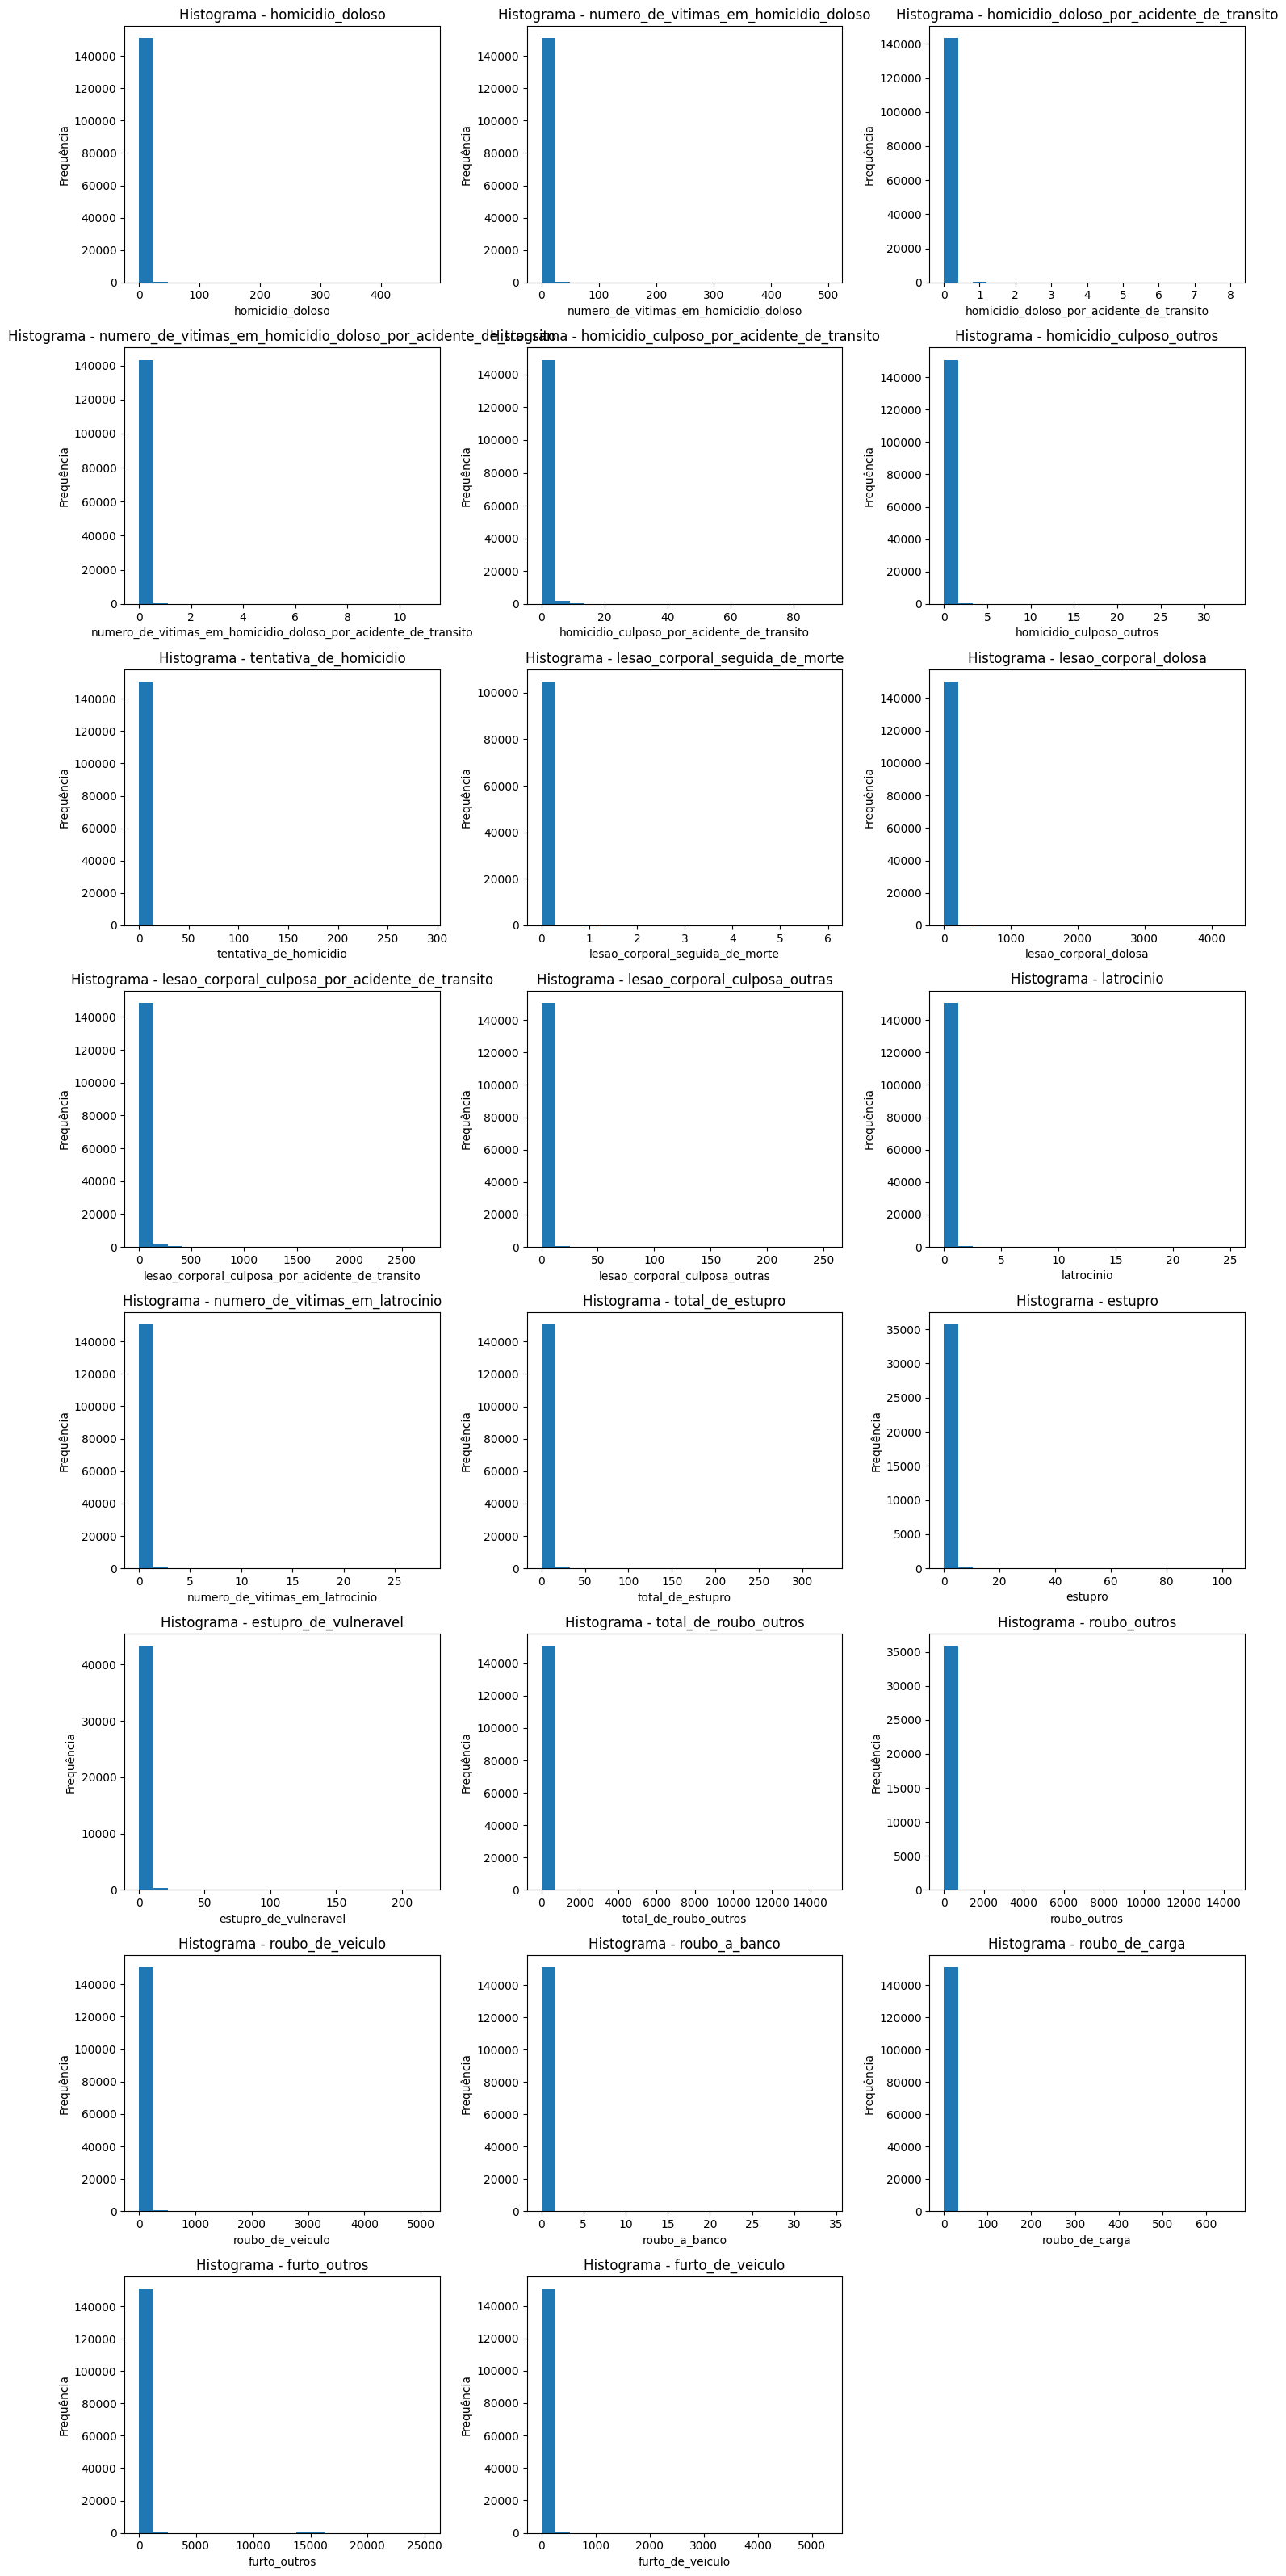

In [57]:
numericas = df.select_dtypes(include='number')

# Número de colunas numéricas
n = len(numericas.columns)

# Layout da grade (ex: 3 gráficos por linha)
cols = 3
rows = math.ceil(n / cols)

# Cria os subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

# Gera um histograma para cada variável numérica
for i, coluna in enumerate(numericas.columns):
    axes[i].hist(numericas[coluna].dropna(), bins=20)
    axes[i].set_title(f'Histograma - {coluna}')
    axes[i].set_xlabel(coluna)
    axes[i].set_ylabel('Frequência')

# Remove subplots vazios (se houver)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<p>O mesmo comportamento se repete nas distribuições, apesar de estar claro no boxsplot, dessa forma é demostrado de forma melhor a distribuição.</p>